### 模式匹配
已经提过 Mathematica 的第二原理：计算即重写。重写分两步，分别是模式匹配和规则带入。我们先来讲模式匹配。<br/>
模式，是指满足一定条件的表达式构成的集合。

最简单的（非平凡）模式是"_"，全名为 $Blank[ ]$，它代表一切表达式。

In [1]:
FullForm /@ {f[_], g[_, _], _[x, y], _[_, _, _]}

{f[Blank[]], g[Blank[], Blank[]], Blank[][x, y], Blank[][Blank[], Blank[], Blank[]]}

_[|      , |                  , |      ]
  Blank[]  _[|      , |      ]  Blank[]
             Blank[]  Blank[]
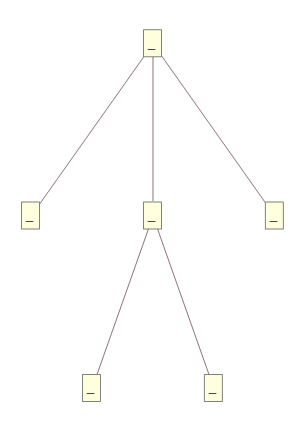

In [2]:
TreeForm[_[_, _[_, _], _]]

In [3]:
FullForm /@ {_ + _, _ - _, _*_, _/_, _^_}

{Times[2, Blank[]], 0, Power[Blank[], 2], 1, Power[Blank[], Blank[]]}

In [1]:
MatchQ[a + b, _ + _]
MatchQ[a + a, _ + _]
MatchQ[a - b, _ - _]
MatchQ[a - a, _ - _]
MatchQ[a*b, _*_]
MatchQ[a*a, _*_]
MatchQ[a/b, _/__]
MatchQ[a/a, _/_]
MatchQ[g[a, b], _[_, _]]

False
True
False
True
False
True
True
True
True

我们可以将匹配好的模式命名，其完整形式为$ Pattern[name, pattern] $，简写形式则有两种，分别对应不同的优先级。

In [13]:
FullForm[x_]
FullForm[x : _]
FullForm[x_[_]]
FullForm[x : _[_]]

Pattern[x, Blank[]]
Pattern[x, Blank[]]
Pattern[x, Blank[]][Blank[]]
Pattern[x, Blank[][Blank[]]]

如果在一个模式中，同一个命名模式出现了多次，它们会被认为是同样的量。

In [17]:
MatchQ[f[a, a], f[x_, x_]]
MatchQ[f[a, b], f[x_, x_]]
MatchQ[f[a, b], f[x_, y_]]

True
False
True

注意模式匹配是按 Mathematica 内部的 FullForm 匹配的，它总是基于词法的，而非基于数学的。例如当我们匹配 $x$^ $\_ $ 这个模式时，$x$ 本身并不会被匹配到，尽管在数学上，$x=x^1$。

In [10]:
{1, x, x^2, x^3} /. {x^n_:> p[n], 1 -> p[0], x -> p[1]}

{p[0], p[1], p[2], p[3]}

In [21]:
{a + b, b + c, Plus[a, Plus[b, c]]} /. {b + x_ :> x}

{a, c, a + c}

$这是因为 Plus 这个函数在 Mathematica 内部具有 Flat 和 Orderless 两种属性，分别对应结合性和交换性。$mma有时会考虑这些属性导致的一些等价形式;<br/>
可以用$ Cases$ 函数来列出所有匹配到的东西。

In [11]:
Cases[1 + x + f[x^2, x^3], x^_]
Cases[1 + x + f[x^2, x^3], x^_, Infinity]
Max[Cases[a0 + a1 x + a2 x^2 + a3 x^3, x^n_ :> n, Infinity]]
Cases[{a -> b, c -> d}, HoldPattern[a -> _]]
DeleteCases[f[x] + g[y], f[_]]
DeleteCases[CoefficientList[(1 + x)^10 + (1 - x)^10, x], 0]

{}
  2   3
{x , x }
3
{a -> b}
g[y]
{2, 90, 420, 420, 90, 2}

比简单匹配稍复杂一点的是类型匹配，完整形式为$ Blank[head]$。

In [17]:
Cases[{1, 2.5, x, y, f[x]}, _f]
Cases[{1, 2.5, x, y, f[x]}, _Symbol]
Cases[{1, 2.5, x, y, f[x]}, _Integer]
Cases[{1, 2.5, x, y, f[x]}, _Real]

{f[x]}
{x, y}
{1}
{2.5}

更复杂的是带条件的模式：

In [21]:
Cases[{1, 2, 3, 4, 5, 6, x, y}, _?(EvenQ[(# + #^2)/2] &)]
Cases[{1, 2, 3, 4, 5, 6, x, y}, _?(Not@EvenQ[(# + #^2)/2] &)]
Cases[{1, 2, 3, 4, 5, 6, x, y}, Except[_?(EvenQ[(# + #^2)/2] &)]]
Cases[{1, 2, 3, 4, 5, 6, x, y}, 
 Except[_?(EvenQ[(# + #^2)/2] &), _?NumberQ]]

{3, 4}
{1, 2, 5, 6, x, y}
{1, 2, 5, 6, x, y}
{1, 2, 5, 6}

与命名类似，条件也有更低优先级的一种简写形式：

In [25]:
Cases[{{1, 2}, {2, 3}, {3, 1}}, _?#[[1]] < #[[2]] &]
Cases[{{1, 2}, {2, 3}, {3, 1}}, {x_, y_} /; x < y]

{}
{{1, 2}, {2, 3}}

运算符$"/;"$经常被用来定义分情况的函数，如著名的$ 3x+1$ 问题：

In [27]:
f[n_] := n/2 /; EvenQ[n]
f[n_] := 3 n + 1 /; OddQ[n]
(* 求导的例子： *)
myD[A_ + B_, x_] := myD[A, x] + myD[B, x];
myD[a_ f_, x_] := a myD[f, x] /; FreeQ[a, x];
myD[Sin[x_], x_] := Cos[x];
myD[Cos[x_], x_] := -Sin[x];
myD[a Sin[y] + b Cos[y], y]

a Cos[y] - b Sin[y]

定义双线性运算

3 inner[x, z]
------------- + inner[y, z]
      2
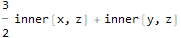

In [35]:
inner[x1_ + x2_, x3_] := inner[x1, x3] + inner[x2, x3];
inner[x1_, x2_ + x3_] := inner[x1, x2] + inner[x1, x3];
inner[a_?NumberQ x1_, x2_] := a inner[x1, x2];
inner[x1_, a_?NumberQ x2_] := a inner[x1, x2];
inner[3 x + 2 y, z/2 ]

有时我们要对好几种情况做同一种规则带入，这时候就需要"或然匹配"，其形式为 p1|p2|p3：

In [40]:
{1, 1/2, 0.25, 3 + 4 I} /. {_Rational -> 0, _Real -> 0}
{1, 1/2, 0.25, 3 + 4 I} /. {_Rational | _Real -> 0}
Cases[Symbol /@ CharacterRange["a", "z"], Except[a | e | i | o | u]]

{1, 0, 0, 3 + 4 I}
{1, 0, 0, 3 + 4 I}
{b, c, d, f, g, h, j, k, l, m, n, p, q, r, s, t, v, w, x, y, z}

对表达式序列进行模式匹配

In [43]:
{f[], f[x], f[x, y]} /. {f[a__] :> {a}}
{f[], f[x], f[x, y]} /. {f[a___] :> {a}}

{f[], {x}, {x, y}}
{{}, {x}, {x, y}}

$eg.判断表中元素是否都是素数。$

{41, 43, 47, 53, 61, 71, 83, 97, 113, 131, 151, 173, 197, 223, 251, 281, 313, 347, 383, 
 
>   421, 461, 503, 547, 593, 641, 691, 743, 797, 853, 911, 971, 1033, 1097, 1163, 1231, 
 
>   1301, 1373, 1447, 1523, 1601}
True
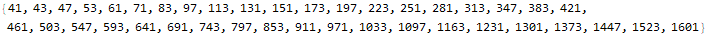

In [1]:
listPrimeQ[list_] := 
  Not@MatchQ[list, {___, _?(Not[PrimeQ[#]] &), ___}];
  list = Array[#^2 + # + 41 &, 40, 0]
(*   指标的起点为0 *)
listPrimeQ[list]

$eg2.微分形式的外积运算。$

In [5]:
Wedge[x1___, x2_ + x3_, x4___] := 
  Wedge[x1, x2, x4] + Wedge[x1, x3, x4];
Wedge[x1___, a_ x2_, x3___] := a Wedge[x1, x2, x3] /; NumberQ[a];
Wedge[x1___, x2_, x3___, x2_, x5___] := 0;
Wedge[x1___, x2_, x3___, x4_, x5___] := -Wedge[x1, x4, x3, x2, x5] /; 
   Not[OrderedQ[{x2, x4}]];

Wedge[x2, 2 x2 + 3 x3, x4]
Wedge[2 x2 + 3 x5, x1, x3]
Wedge[y3, y1, 2 x1 + 3 y2]

3 x2 ⋀ x3 ⋀ x4
-2 x1 ⋀ x2 ⋀ x3 + 3 x1 ⋀ x3 ⋀ x5
-2 x1 ⋀ y1 ⋀ y3 + 3 y1 ⋀ y2 ⋀ y3

用 Longest 和 Shortest 可以控制"__"和"___"的匹配长度：

In [12]:
{a, b, c, d, e, f, g} /. {x__, y__, z__} -> {{x}, {y}, {z}}
{a, b, c, d, e, f, g} /. {x__, Longest[y__], z__} -> {{x}, {y}, {z}}

{{a}, {b}, {c, d, e, f, g}}
{{a}, {b, c, d, e, f}, {g}}

重复模式：

In [14]:
Cases[{f[a], f[a, b], f[a, a], f[a, a, a]}, f[a ..]]
Cases[{f[a], f[a, b], f[a, a], f[a, a, a]}, f[Repeated[a]]]
Cases[{f[a], f[a, b], f[a, a], f[a, a, a]}, f[Repeated[a, 2]]]
Cases[{f[a], f[a, b], f[a, a], f[a, a, a]}, f[Repeated[a, {2, 3}]]]

{f[a], f[a, a], f[a, a, a]}
{f[a], f[a, a], f[a, a, a]}
{f[a], f[a, a]}
{f[a, a], f[a, a, a]}

模式序列：

In [18]:
f[x : PatternSequence[_, _], y___] := p[{x}, {y}]
{f[1], f[1, 2], f[1, 2, 3, 4, 5]}
{a, b, b, a, b, a, b, a, a, 
  b} /. {___, x : Longest[PatternSequence[a, b] ..], ___} :> {x}

{f[1], p[{1, 2}, {}], p[{1, 2}, {3, 4, 5}]}
{a, b, a, b}

模式的默认值：

In [21]:
plus[x_ : 0, y_ : 0] := x + y;
plus[]
plus[x]
plus[x, y]
Plus[x]
Times[x]
Power[x]
{1, x, x^2, x^3} /. {x^n_ :> n}
{1, x, x^2, x^3} /. {x^n_. :> n}

0
x
x + y
x
x
x
{1, x, 2, 3}
{1, 1, 2, 3}

字面模式：

In [30]:
{f[2], f[a], f[x_], f[y_]} /. f[x_] :> x^2
{f[2], f[a], f[x_], f[y_]} /. f[Verbatim[x_]] :> x^2

2      2      2
{4, a , (x_) , (y_) }
              2
{f[2], f[a], x , f[y_]}